In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Gradient descent from Scratch

### Compute cost

In [3]:
def computeCost(X, y, theta):
    cost = X.dot(theta) - y
    return np.dot(cost,cost) / (2*len(y))

In [4]:
X     = np.array([[1],[2],[3]])
y     = np.array([1,2,3])

print(X.shape, y.shape, np.array([1]).shape)

(3, 1) (3,) (1,)


In [5]:
print(computeCost(X, y, np.array([1])))
print(computeCost(X, y, np.array([.5])))
print(computeCost(X, y, np.array([0])))

0.0
0.5833333333333334
2.3333333333333335


### Gradient descent

In [6]:
def gradientDescent(X, y, theta, alpha, epochs):
    m = len(y)

    for i in range(epochs):
        gradient = (X.T.dot(X.dot(theta) - y)) / m
        theta   -= alpha * gradient

    return theta

In [7]:
theta = np.array([0.0])

for i in range(10):
    theta = gradientDescent(X, y, theta, 0.1, 1)
    print(theta)

[0.46666667]
[0.71555556]
[0.8482963]
[0.91909136]
[0.95684872]
[0.97698599]
[0.98772586]
[0.99345379]
[0.99650869]
[0.99813797]


### Fit

In [8]:
X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([7,9,12,15,16])
theta = np.random.rand(2)

# Add intercept
m  = len(X)
b  = np.ones((m,1))
Xb = np.concatenate([b, X], axis=1)

print(Xb.shape, Y.shape, theta.shape)

(5, 2) (5,) (2,)


In [9]:
# Fit
b, a = gradientDescent(Xb, Y, theta=theta, alpha=0.01, epochs=5000)
print(b,a)

4.599299279395137 2.400194088371456


### Plot

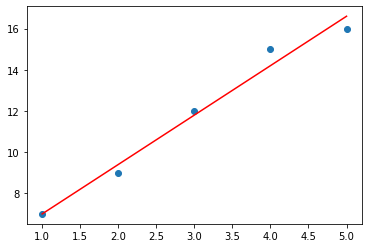

In [10]:
plt.scatter(X,Y)

_X = np.arange(X.min(), X.max()+1, 1)
_Y = a*_X+b
plt.plot(_X, _Y, '-r')

## Using tensorflow

In [11]:
import tensorflow as tf

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,),
                          activation='linear', use_bias=False)
])
model.compile(
    optimizer='SGD',
    loss='mse'
)
r = model.fit(Xb, Y, epochs=1000, verbose=0)

In [13]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[4.497686 ],
        [2.4283392]], dtype=float32)>]

In [14]:
res  = model.weights[0].value().numpy()
b, a = res
print(b,a)

[4.497686] [2.4283392]


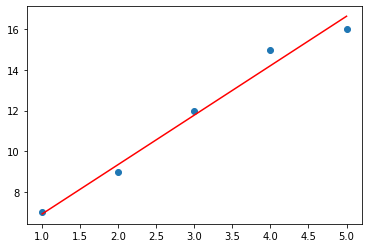

In [15]:
plt.scatter(X,Y)

_X = np.arange(X.min(), X.max()+1, 1)
_Y = a[0]*_X+b[0]
plt.plot(_X, _Y, '-r')